## Project Objective:
We are building a calories burnt predictive system using XGBoost based on the user's height, weight, exercise duration, exercise heart rate, etc. 

The system is at the end of this notebook. Please feel free to try it out! 

## Workflow
1. Data collection
2. Data preprocessing
3. Data analysis and visualization
4. Train test split
5. Model training: XGBoost Regressor
6. Model evaluation

### Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

### Data Collection and Analysis

In [38]:
# loading the dataset from the csv file to a Pandas Dataframe
big_mart_data = pd.read_csv('salesTrain.csv')

In [39]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# check the size of the dataset, aka number of data points and number of features
big_mart_data.shape

(8523, 12)

In [6]:
# getting some information about the dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Categorical features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [40]:
# check for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Handling missing values

- Mean (average value) for numerical feature
- Mode (most repeated value) for categorical feature

In [8]:
# mean value of 'Item_Weight' column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [41]:
# filling the missing values in 'Item_Weight' column with its mean value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace = True)

In [42]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [43]:
# replacing the missing values in 'Outlet_Size' with mode
mode_of_outlet_size = big_mart_data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x:x.mode()[0]))

In [44]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [48]:
type(mode_of_outlet_size)

pandas.core.frame.DataFrame

In [45]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [46]:
missing_values[:4]

0    False
1    False
2    False
3     True
Name: Outlet_Size, dtype: bool

In [47]:
missing_values.shape

(8523,)

In [49]:
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x:mode_of_outlet_size[x])

In [50]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Data Analysis

In [17]:
# statistical measures about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Numerical features

In [18]:
sns.set()

C:\Users\zxy23\AppData\Local\Temp\ipykernel_28872\3633713972.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


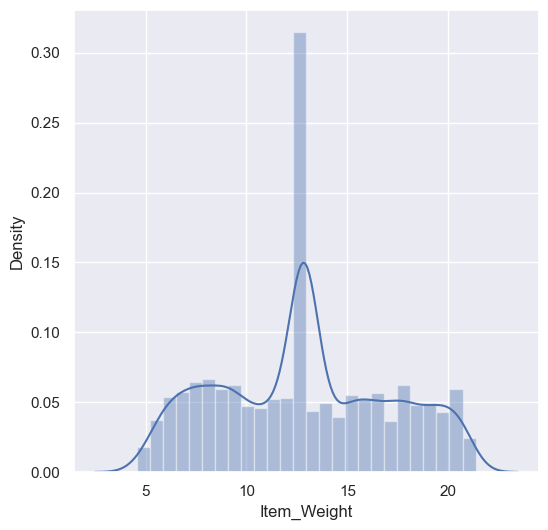

In [21]:
# Item_Weight distribution
plt.figure(figsize = (6, 6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

C:\Users\zxy23\AppData\Local\Temp\ipykernel_28872\3545517806.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


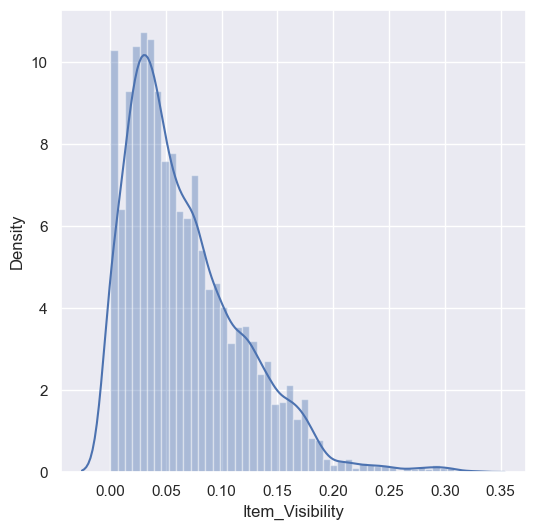

In [22]:
# Item_Visibility distribution
plt.figure(figsize = (6, 6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

C:\Users\zxy23\AppData\Local\Temp\ipykernel_28872\3411221506.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


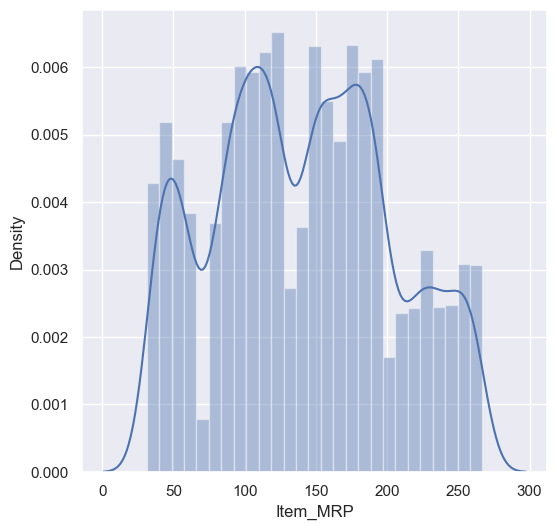

In [23]:
# Item_MRP distribution
plt.figure(figsize = (6, 6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

C:\Users\zxy23\AppData\Local\Temp\ipykernel_28872\1229837520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


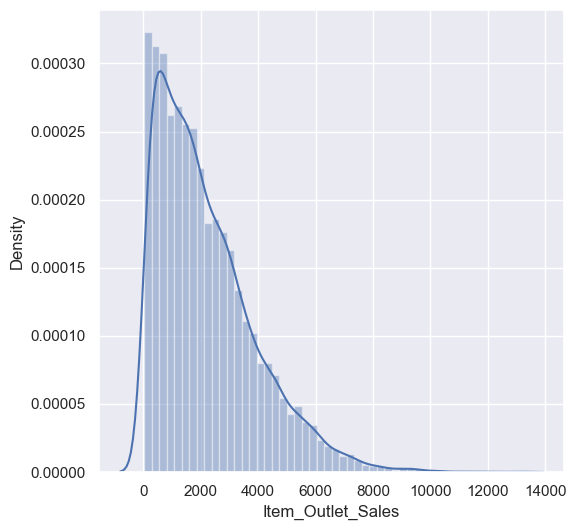

In [24]:
# Item_Outlet_Sales distribution
plt.figure(figsize = (6, 6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

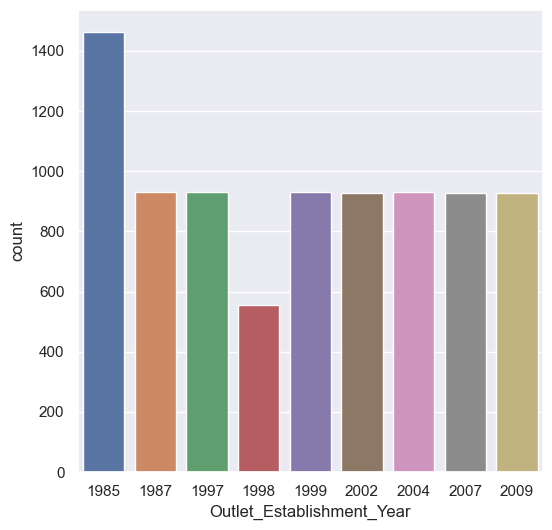

In [25]:
# Outlet_Establishment_Year count plot
plt.figure(figsize = (6, 6))
sns.countplot(x = 'Outlet_Establishment_Year', data = big_mart_data)
plt.show()

#### Categorical features

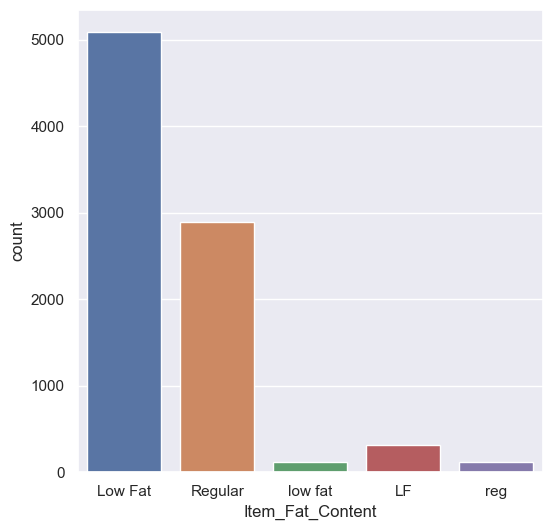

In [26]:
# Item_Fat_Content count plot
plt.figure(figsize = (6, 6))
sns.countplot(x = 'Item_Fat_Content', data = big_mart_data)
plt.show()

In [27]:
# combine all 'Low Fat' and all 'Regular' -- Data Pre-Processing (we'll do it later)

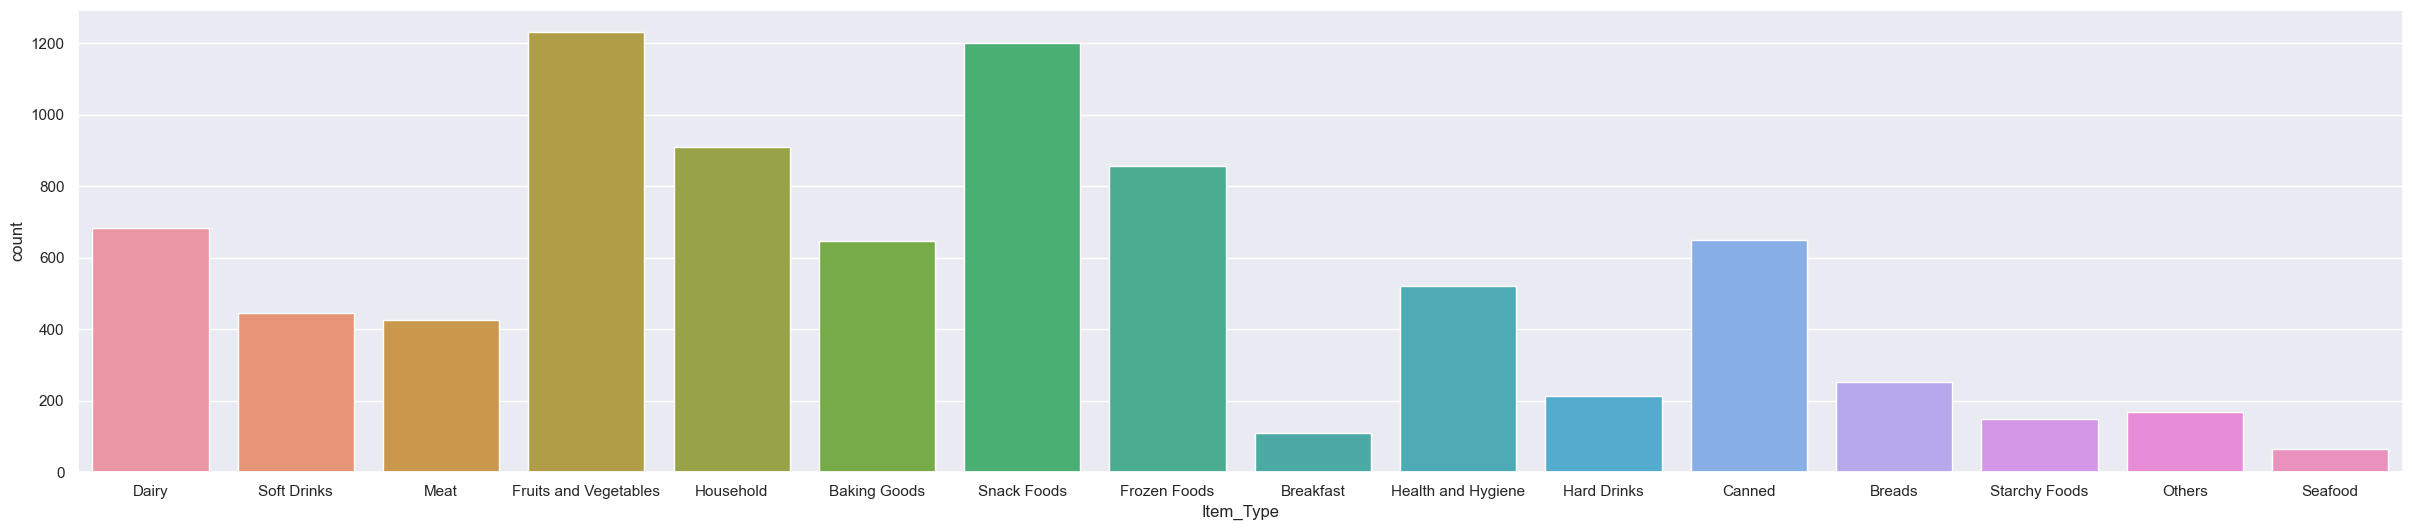

In [29]:
# Item_Type count plot
plt.figure(figsize = (30, 6))
sns.countplot(x = 'Item_Type', data = big_mart_data)
plt.show()

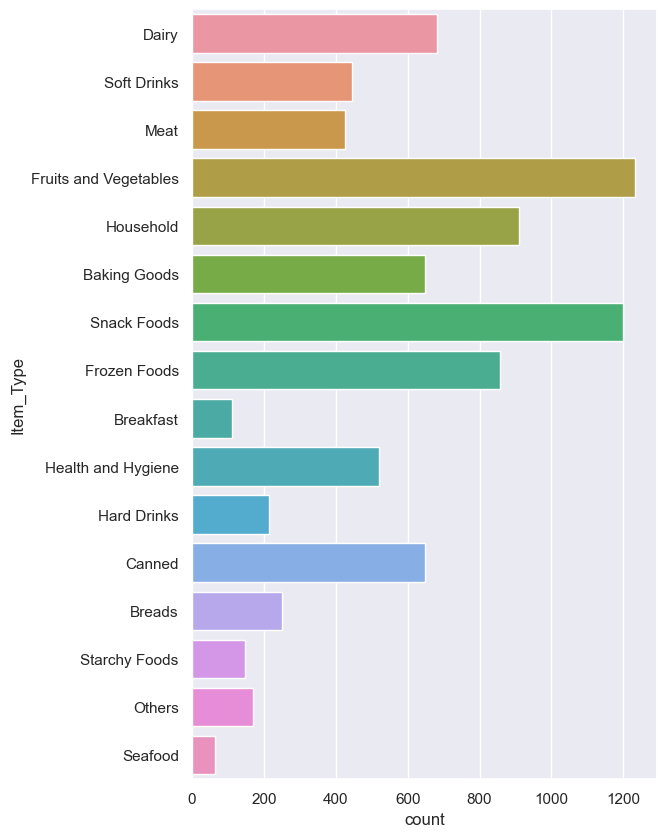

In [33]:
# Item_Type count plot
plt.figure(figsize = (6, 10))
sns.countplot(y = 'Item_Type', data = big_mart_data)
plt.show()

In [36]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


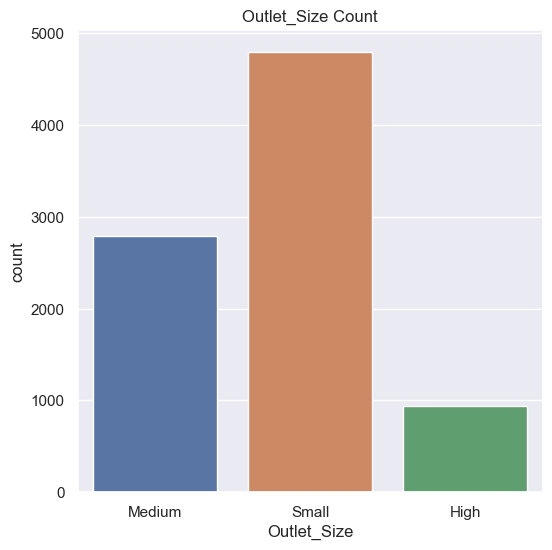

In [52]:
# Outlet_Size count plot
plt.figure(figsize = (6, 6))
sns.countplot(x = 'Outlet_Size', data = big_mart_data)
plt.title('Outlet_Size Count')
plt.show()

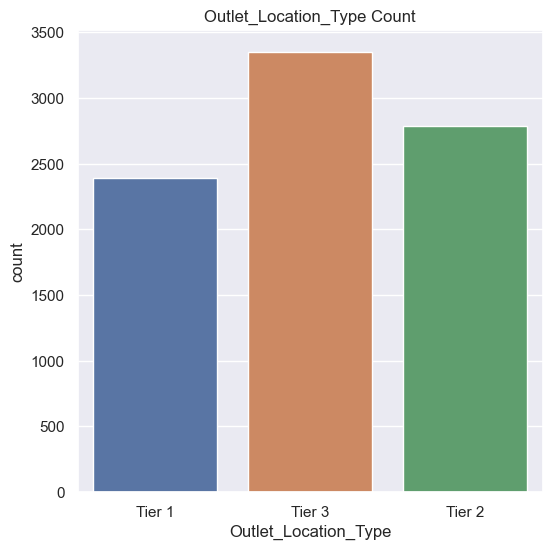

In [53]:
# Outlet_Location_Type count plot
plt.figure(figsize = (6, 6))
sns.countplot(x = 'Outlet_Location_Type', data = big_mart_data)
plt.title('Outlet_Location_Type Count')
plt.show()

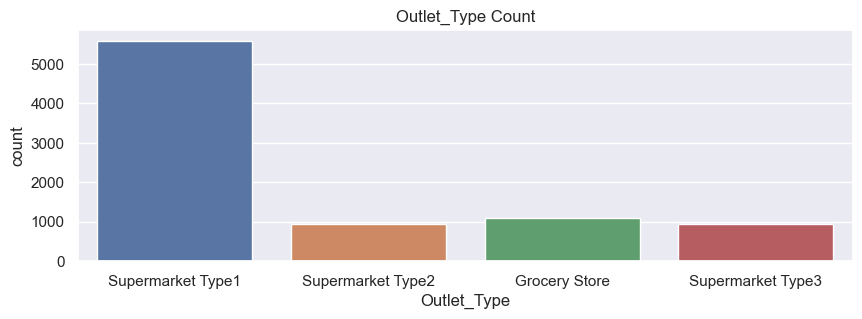

In [56]:
# Outlet_Type count plot
plt.figure(figsize = (10, 3))
sns.countplot(x = 'Outlet_Type', data = big_mart_data)
plt.title('Outlet_Type Count')
plt.show()

### Data Pre-Processing

In [57]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [58]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [59]:
big_mart_data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace = True)

In [60]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Label encoding

In [61]:
encoder = LabelEncoder()

In [62]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])
big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [64]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### Splitting features and the target

In [65]:
X = big_mart_data.drop(columns = 'Item_Outlet_Sales', axis = 1)
Y = big_mart_data['Item_Outlet_Sales']

In [66]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [67]:
Y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [68]:
big_mart_data.shape, X.shape, Y.shape

((8523, 12), (8523, 11), (8523,))

### Splitting the data into Training data & Test data

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [70]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6818, 11), (1705, 11), (6818,), (1705,))

### Machine Learning Model Training - XGBoost Regressor

In [71]:
regressor = XGBRegressor()

In [72]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Model Evaluation

In [73]:
# Predict on training data
training_data_prediction = regressor.predict(X_train)

In [74]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [75]:
r2_train

0.8639680373364909

In [78]:
print('R Squared value on training data: {:.2f}'.format(r2_train))

R Squared value on training data: 0.86


In [79]:
# Predict on test data
test_data_prediction = regressor.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

print('R Squared value on test data: {:.2f}'.format(r2_test))

R Squared value on test data: 0.52
